# Display MIPI input on Display Port output
---

## Aim

* This notebook illustrates how to setup a MIPI camera (Digilent Pcam 5C) and route what is seen by the camera to the Display Port. 

## References
* [Digilent Pcam 5C Camera](https://reference.digilentinc.com/reference/add-ons/pcam-5c/start)    

## Revision History

* Initial Release
* 30 April 2021 | Use updated API

---

## Load _base_ Overlay, import video and image libraries

In [1]:
from kv260 import BaseOverlay
from pynq.lib.video import *
import PIL.Image

base = BaseOverlay("base.bit")

## Initialize and setup the MIPI camera
Grab a handler to the MIPI hierarchy, this will initialize the camera

In [2]:
mipi = base.mipi

Setup the camera for 1280x720 mode with 24-bits pixel. Start reading from the camera.

In [3]:
videomode = VideoMode(1280, 720, 24)

mipi.configure(videomode)

mipi.start()

Grab a frame and display in the notebook. 

Note that the channels are arranged differently that what PIL expects, for that reason we reorder them 

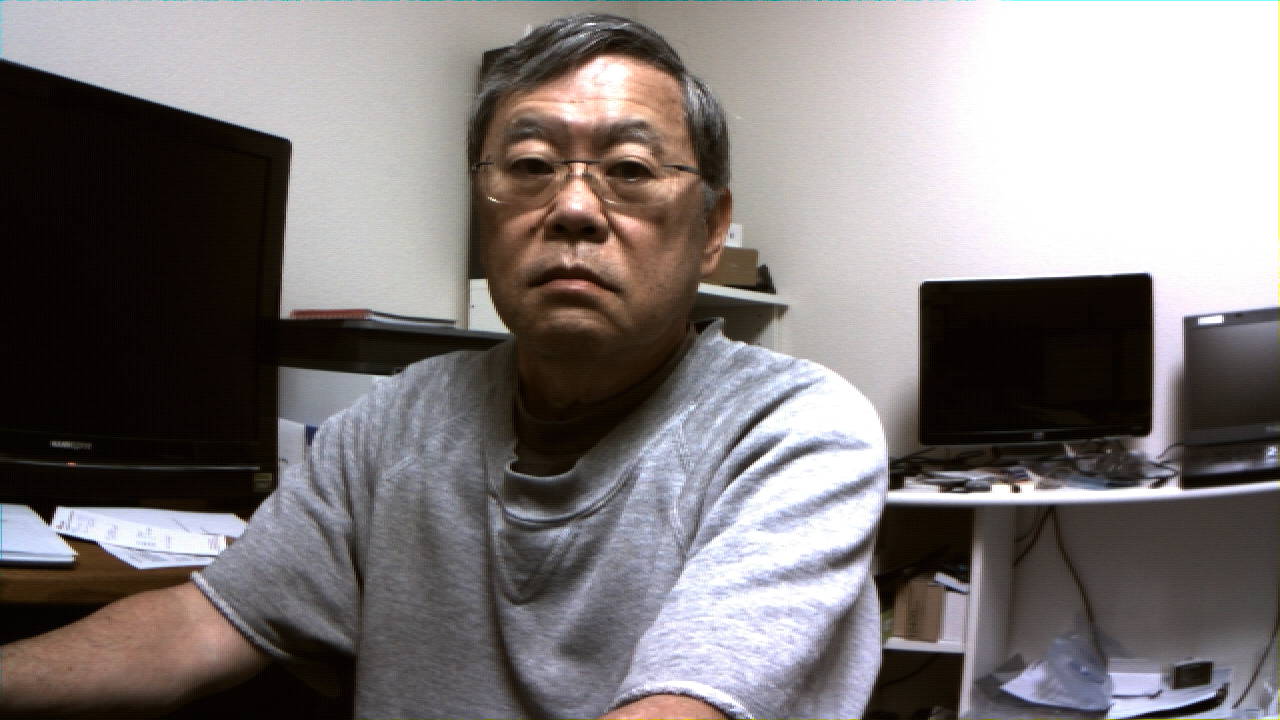

In [7]:
frame = mipi.readframe()
PIL.Image.fromarray(frame[:,:,[2,1,0]])

## Start the Display Port

Next we create a `DisplayPort` object and configure it with the resolution and pixel format we would like.

In [7]:
displayport = DisplayPort()

displayport.configure(videomode, PIXEL_RGB)

Read and display 200 frames

In [8]:
import time
num_frames = 200
start = time.time()

for _ in range (num_frames):
    frame = displayport.newframe()
    frame[:] = mipi.readframe()
    displayport.writeframe(frame)

end = time.time()
duration = end - start
print(f"Took {duration} seconds at {num_frames / duration} FPS")

Took 6.624564170837402 seconds at 30.190665354324473 FPS


## Cleanup Display Port and MIPI camera buffer

Close display port, stop MIPI camera and free the overlay

In [9]:
displayport.close()

mipi.stop()

base.free()

----
Copyright &copy; 2021 Xilinx, Inc

SPDX-License-Identifier: BSD-3-Clause
